<a href="https://colab.research.google.com/github/JScottLopez/JScottLopez/blob/main/Lopez_J_DDS_8555v1_Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Author: Joseph Lopez
#2/27/2025

#Install the necessary packages
from sklearn import datasets
import pandas as pd
import numpy as np

#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

# Load data from a CSV file
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

train.describe()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
#Check for null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


In [ ]:
#Investigate categorical column
train['Sex'].value_counts()

,count
Sex,
I,33093
M,31027
F,26495


In [ ]:
#Use one hot encoding to sub numerical values for categorical values
train = pd.get_dummies(train, columns=['Sex'], dtype=int)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
 9   Sex_F           90615 non-null  int64  
 10  Sex_I           90615 non-null  int64  
 11  Sex_M           90615 non-null  int64  
dtypes: float64(7), int64(5)
memory usage: 8.3 MB


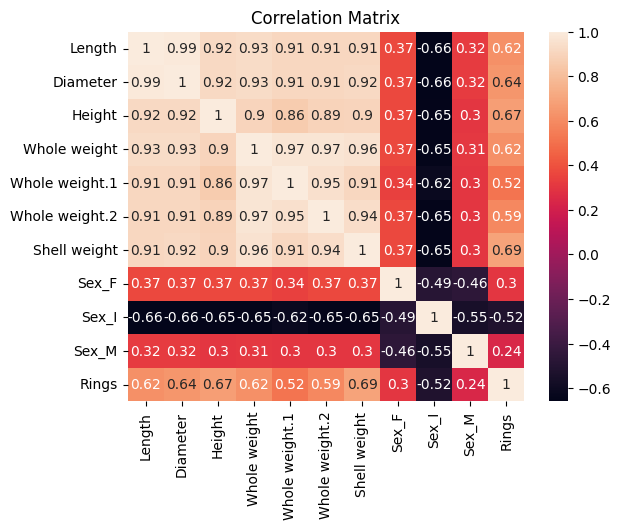

In [ ]:
#Conduct EDA
import matplotlib.pyplot as plt
import seaborn as sns

#Drop Id
train = train.iloc[:, [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 8]]

#Setup correlation matrix
corr_matrix = round(train.corr(), 2)

#Setup heatmap
hm = sns.heatmap(data=corr_matrix, annot=True)

plt.title('Correlation Matrix')
plt.show()

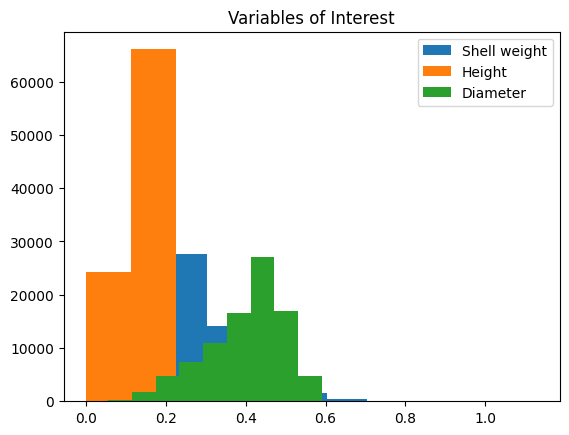

In [ ]:
#Visualize variables of interest

plt.hist(train['Shell weight'],
         label='Shell weight')
plt.hist(train['Height'],
         label='Height')
plt.hist(train['Diameter'],
         label='Diameter')

plt.legend(loc='upper right')
plt.title('Variables of Interest')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Use variables of interest for Model 1
x1 = train[['Shell weight', 'Height', 'Diameter']]
y = train['Rings']
x_test1 = test[['Shell weight', 'Height', 'Diameter']]

#Scale data
scaler1 = MinMaxScaler()
x1_scaled = scaler1.fit_transform(x1)
x_test1_scaled = scaler1.transform(x_test1)

#Fit model
lr1 = LinearRegression()
lr1.fit(x1_scaled, y)

#Make predictions
y_predict1 = lr1.predict(x1_scaled)

#Evaluate model using Mean Squared Error
mse1 = mean_squared_error(y, y_predict1)
print(f'Mean Squared Error for Model 1: {mse1}')


Mean Squared Error for Model 1: 5.106740104299221


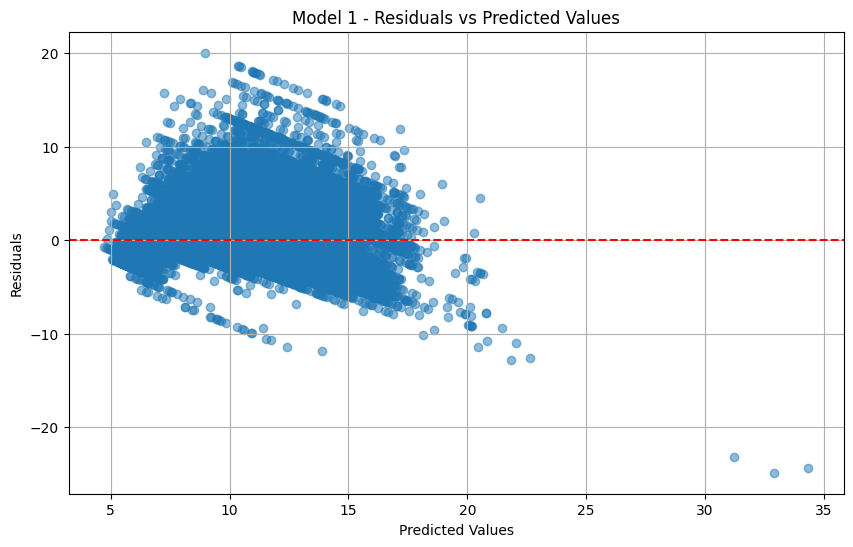

VIF for Model 1:
         feature        VIF
0  Shell weight  12.202576
1        Height  85.839827
2      Diameter  90.397263


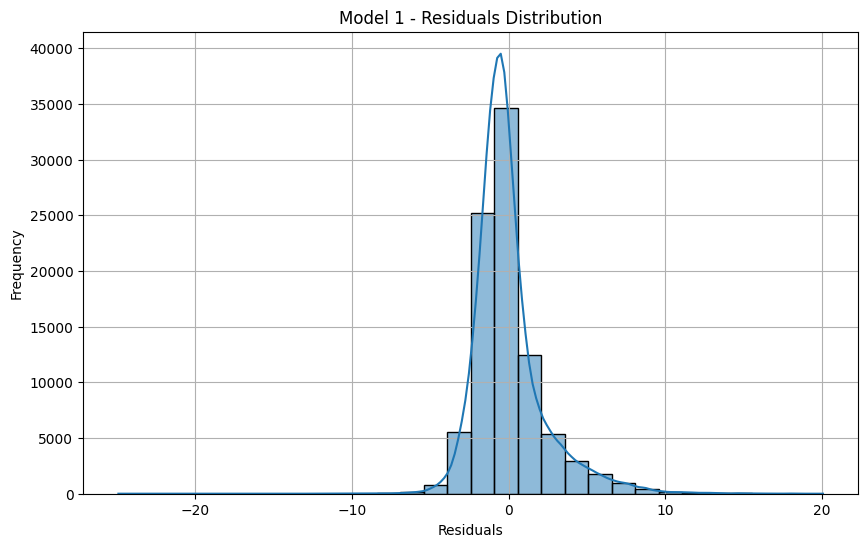

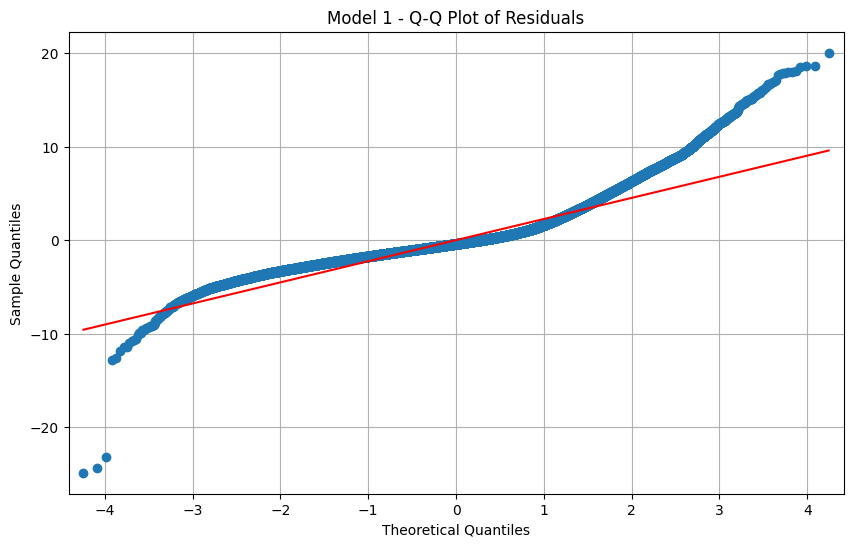

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Calculate residuals
residuals1 = y - y_predict1
#Compare residuals with predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_predict1, residuals1, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Model 1 - Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()
#Function for VIF
def calculate_vif(X):
    vif_df = pd.DataFrame()
    vif_df["feature"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_df
#Calculate VIF
x1_df = pd.DataFrame(x1_scaled, columns=x1.columns)
vif_results = calculate_vif(x1_df)
print("VIF for Model 1:\n", vif_results)
#Generate histogram for residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals1, bins=30, kde=True)
plt.title('Model 1 - Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()
#Generate Q-Q plot for residuals
plt.figure(figsize=(10, 6))
sm.qqplot(residuals1, line='s', ax=plt.gca())
plt.title('Model 1 - Q-Q Plot of Residuals')
plt.grid()
plt.show()

In [ ]:
#Use additional variables for Model 2
x2 = train[['Length', 'Shell weight', 'Height', 'Diameter', 'Whole weight']]
x_test2 = test[['Length', 'Shell weight', 'Height', 'Diameter', 'Whole weight']]

#Scale data
scaler2 = MinMaxScaler()
x2_scaled = scaler2.fit_transform(x2)
x_test2_scaled = scaler2.transform(x_test2)

#Fit model
lr2 = LinearRegression()
lr2.fit(x2_scaled, y)

#Make predictions
y_predict2 = lr2.predict(x2_scaled)

#Evaluate model using Mean Squared Error
mse2 = mean_squared_error(y, y_predict2)
print(f'Mean Squared Error for Model 2: {mse2}')

Mean Squared Error for Model 2: 4.578105366662777


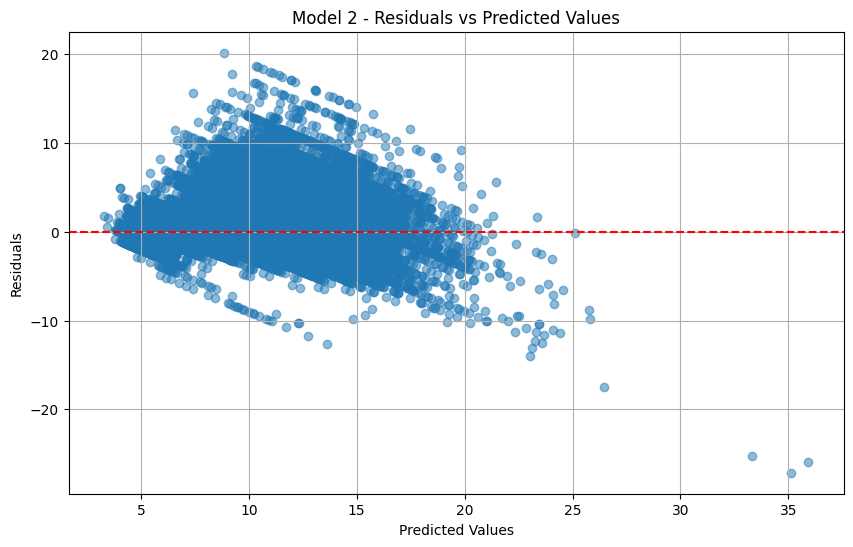

VIF for Model 2:
         feature         VIF
0        Length  689.504416
1  Shell weight   61.067289
2        Height   92.168313
3      Diameter  726.062461
4  Whole weight   61.439428


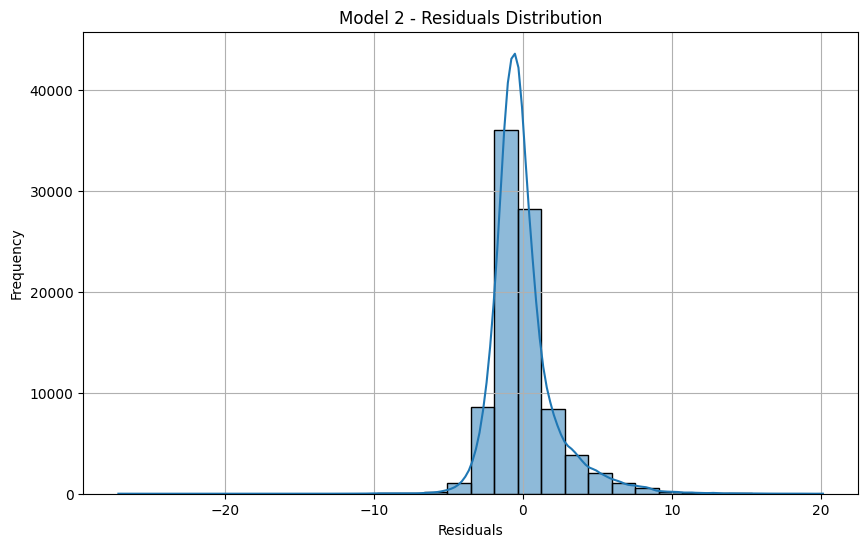

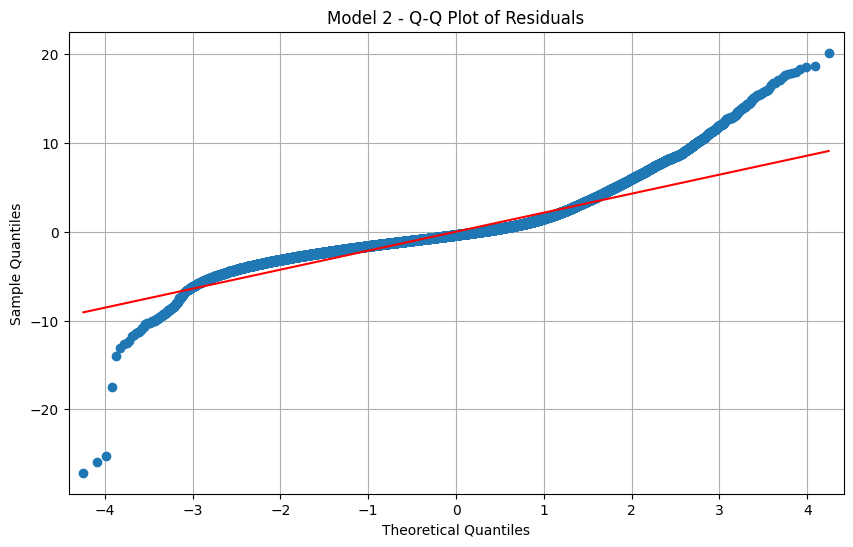

In [ ]:
#Calculate residuals
residuals2 = y - y_predict2
#Compare residuals with predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_predict2, residuals2, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Model 2 - Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid()
plt.show()
#Function for VIV
def calculate_vif(X):
    vif_df = pd.DataFrame()
    vif_df["feature"] = X.columns
    vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_df
#Calcualte VIF
x2_df = pd.DataFrame(x2_scaled, columns=x2.columns)
vif_results = calculate_vif(x2_df)
print("VIF for Model 2:\n", vif_results)
#Generate histogram for residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals2, bins=30, kde=True)
plt.title('Model 2 - Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.show()
#Generate Q-Q Plot for residuals
plt.figure(figsize=(10, 6))
sm.qqplot(residuals2, line='s', ax=plt.gca())
plt.title('Model 2 - Q-Q Plot of Residuals')
plt.grid()
plt.show()

In [ ]:
#Use model 1 with 3 variables of interest
y_test_predict1 = lr1.predict(x_test1_scaled)
submission1 = pd.DataFrame({'id':test['id'],'Rings':y_test_predict1})
print(submission1)

#Use model 2 with 5 variables of interest
y_test_predict2 = lr2.predict(x_test2_scaled)
submission2 = pd.DataFrame({'id':test['id'],'Rings':y_test_predict2})
print(submission2)

           id      Rings
0       90615  10.836771
1       90616  10.674698
2       90617   9.915190
3       90618   9.569181
4       90619   7.765979
...       ...        ...
60406  151021   6.729067
60407  151022   9.581611
60408  151023  10.520520
60409  151024  13.342553
60410  151025   7.716992

[60411 rows x 2 columns]
           id      Rings
0       90615   9.490217
1       90616  10.781033
2       90617   9.849379
3       90618  10.289425
4       90619   8.046729
...       ...        ...
60406  151021   6.658866
60407  151022   9.005720
60408  151023   9.159960
60409  151024  13.212587
60410  151025   7.576129

[60411 rows x 2 columns]


In [ ]:
#Convert output to CSV files
submission1.to_csv('submission1.csv', index=False)
submission2.to_csv('submission2.csv', index=False)